In [1]:
%load_ext autoreload
%autoreload 2

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from waymo_object import kitti_object, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes


In [37]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

Notebook initialized with ipy backend.


In [38]:
data_root = '/Pseudo_Lidar_V2/waymo_kitti_converter/data/waymo/'

In [39]:
'/Pseudo_Lidar_V2/waymo_kitti_converter/data/waymo/training/image_2/0000000.jpg'

'/Pseudo_Lidar_V2/waymo_kitti_converter/data/waymo/training/image_2/0000000.jpg'

In [40]:
objects

In [41]:
# dataset = kitti_object('../data/object', 'training')
dataset = kitti_object(data_root, 'training', camera_name=1)

data_idx = 24
objects = dataset.get_label_objects(data_idx)
# objects = dataset.get_pred_objects(data_idx)
pc_velo = dataset.get_lidar(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape

fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
fig_3d

/Pseudo_Lidar_V2/waymo_kitti_converter/data/waymo/ training
/Pseudo_Lidar_V2/waymo_kitti_converter/data/waymo/training/velodyne/0000024.bin
('All point num: ', 182748)
('FOV point num: ', (21164, 4))
pc_velo (21164, 4)
==================== (21164, 4)
box3d_pts_3d_velo:
[[21.54480037 -3.84049586  0.79866432]
 [20.90366643 -6.12169482  0.84314564]
 [14.99270699 -4.46032791  0.84745592]
 [15.63384094 -2.17912895  0.8029746 ]
 [21.56321347 -3.78328478  3.99809987]
 [20.92207952 -6.06448374  4.04258119]
 [15.01112009 -4.40311683  4.04689147]
 [15.65225403 -2.12191787  4.00241015]]
box3d_pts_3d_velo:
[[32.48363459 -6.42017527  0.84184957]
 [32.04171971 -8.36013015  0.87908237]
 [27.53715386 -7.33386062  0.88665527]
 [27.97906874 -5.39390573  0.84942247]
 [32.49704162 -6.37851845  3.17143858]
 [32.05512675 -8.31847334  3.20867138]
 [27.5505609  -7.2922038   3.21624428]
 [27.99247577 -5.35224891  3.17901149]]
box3d_pts_3d_velo:
[[-57.29581182  16.53805896   3.61848064]
 [-55.58622045  15.88522

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xc2\x08\x02\x00\x00\x00\x98\x01:\x9…

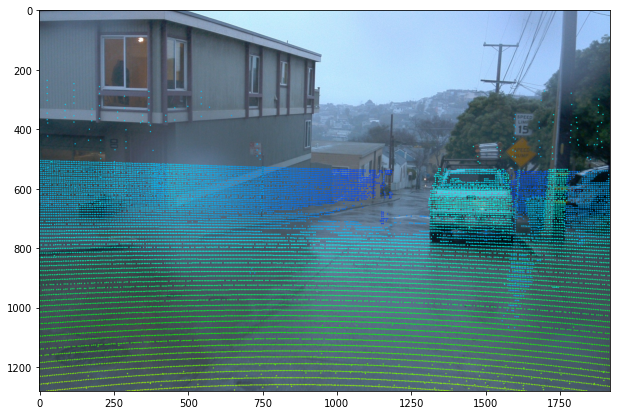

In [42]:
img_lidar = show_lidar_on_image(pc_velo[:, :3], img, calib, img_width, img_height)
img_lidar = cv2.cvtColor(img_lidar, cv2.COLOR_BGR2RGB)

fig_lidar = plt.figure(figsize=(14, 7))
ax_lidar = fig_lidar.subplots()
ax_lidar.imshow(img_lidar)
plt.show()

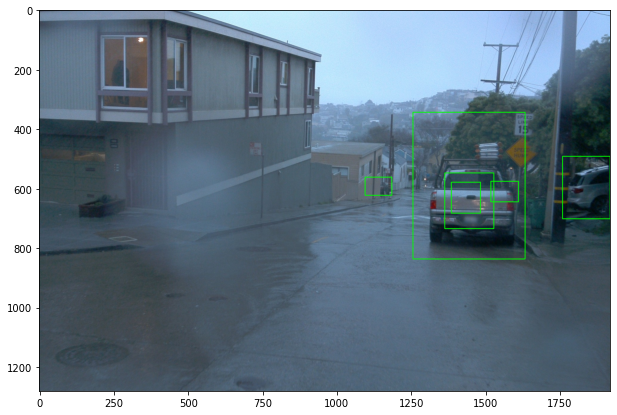

In [43]:
img_bbox2d, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox2d = cv2.cvtColor(img_bbox2d, cv2.COLOR_BGR2RGB)

fig_bbox2d = plt.figure(figsize=(14, 7))
ax_bbox2d = fig_bbox2d.subplots()
ax_bbox2d.imshow(img_bbox2d)
plt.show()

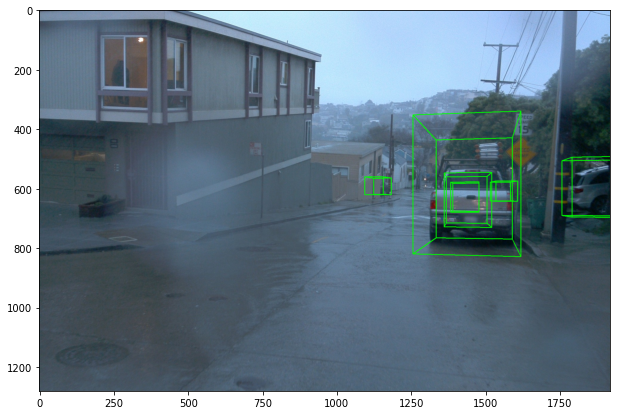

In [44]:
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()

top_image: (500, 300, 3)


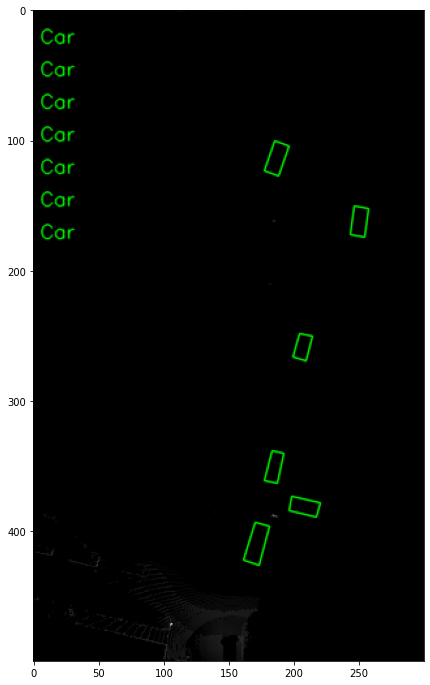

In [45]:
img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

fig_bev = plt.figure(figsize=(7, 14))
ax_bev = fig_bev.subplots()
ax_bev.imshow(img_bev)
plt.show()